# Part 3: Finite Square Well - Bound States and Tunneling

## Introduction

The **finite square well** is crucial for understanding:
1. **Bound states** with finite number of energy levels
2. **Quantum tunneling** - particles in classically forbidden regions
3. Real systems like quantum dots and nuclear potentials

### The Potential
$$V(x) = \begin{cases} -V_0 & |x| < a \\ 0 & |x| \geq a \end{cases}$$

- Inside the well ($|x| < a$): particle feels attractive potential
- Outside ($|x| \geq a$): free particle region
- Deeper well (larger $V_0$) → more bound states

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg

plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.family'] = 'DejaVu Sans'  # Or 'Liberation Sans', 'cmr10'

HBAR = 1.0
M = 1.0

In [2]:
# Core functions from previous notebooks
def create_grid(x_min, x_max, N):
    x = np.linspace(x_min, x_max, N)
    return x, x[1] - x[0]

def build_kinetic(N, dx, hbar=HBAR, m=M):
    coeff = -hbar**2 / (2 * m * dx**2)
    main_diag = -2 * np.ones(N)
    off_diag = np.ones(N - 1)
    return coeff * (np.diag(main_diag) + np.diag(off_diag, 1) + np.diag(off_diag, -1))

def solve_schrodinger(T, V, n_states=5):
    H = T + np.diag(V)
    eigenvalues, eigenvectors = linalg.eigh(H)
    return eigenvalues[:n_states], eigenvectors[:, :n_states]

## Defining the Potentials

We define two potentials:
1. **Finite well** (attractive): $V = -V_0$ inside
2. **Barrier** (repulsive): $V = +V_0$ inside

In [3]:
def finite_well_potential(x, V0, a):
    """
    Finite square well potential.
    
    Parameters:
    -----------
    x : ndarray
        Position grid
    V0 : float
        Well depth (positive number)
    a : float
        Half-width of well
        
    Returns:
    --------
    V : ndarray
        V(x) = -V0 inside well, 0 outside
    """
    V = np.zeros_like(x)
    # Apply potential only where |x| < a
    inside_well = np.abs(x) < a
    V[inside_well] = -V0
    return V

def barrier_potential(x, V0, a):
    """
    Potential barrier (opposite of well).
    V(x) = +V0 inside, 0 outside
    Used to study tunneling and quasi-bound states.
    """
    V = np.zeros_like(x)
    V[np.abs(x) < a] = V0
    return V

In [4]:
# ============================================================
# SOLVE FINITE SQUARE WELL
# ============================================================

# Well parameters
V0 = 10.0   # Depth of well
a = 2.0     # Half-width
N = 500     # Grid points
x_min, x_max = -10, 10

# Build matrices
x, dx = create_grid(x_min, x_max, N)
T = build_kinetic(N, dx)
V_well = finite_well_potential(x, V0, a)

# Solve for many states to find all bound states
all_energies, all_psi = solve_schrodinger(T, V_well, n_states=20)

# Bound states have E < 0 (below the well edge)
bound_mask = all_energies < 0
bound_energies = all_energies[bound_mask]
bound_psi = all_psi[:, bound_mask]
n_bound = len(bound_energies)

# Normalize bound states
for i in range(n_bound):
    norm = np.sqrt(np.trapezoid(bound_psi[:, i]**2, x))
    bound_psi[:, i] /= norm

print(f"Well parameters: V₀ = {V0}, a = {a}")
print(f"Found {n_bound} bound states:")
for i, E in enumerate(bound_energies):
    print(f"  n={i}: E = {E:.4f}")

Well parameters: V₀ = 10.0, a = 2.0
Found 6 bound states:
  n=0: E = -9.7518
  n=1: E = -9.0100
  n=2: E = -7.7836
  n=3: E = -6.0916
  n=4: E = -3.9732
  n=5: E = -1.5350


## Visualizing Tunneling (Exponential Tails)

### The Key Physics

In classical physics, a particle with $E < 0$ cannot exist where $V = 0$.

In quantum mechanics, the wavefunction **penetrates** into the classically forbidden region!

The wavefunction decays exponentially: $\psi(x) \sim e^{-\kappa|x|}$ outside the well

where $\kappa = \sqrt{-2mE}/\hbar$ is the decay constant.

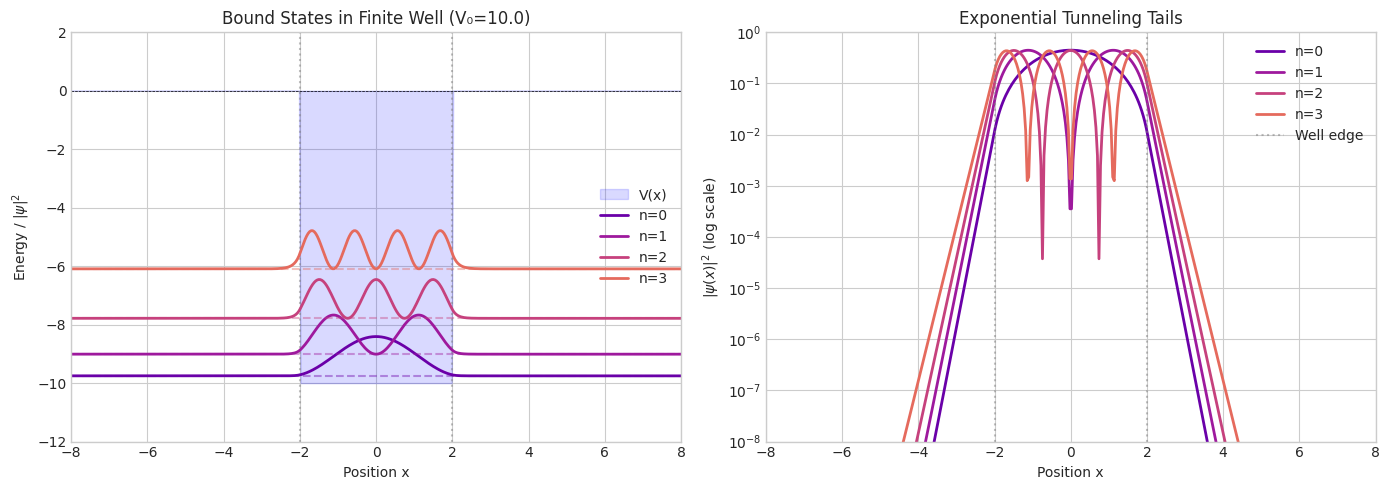

In [ ]:
# ============================================================
# PLOT BOUND STATES WITH EXPONENTIAL TAILS
# ============================================================

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
colors = plt.cm.plasma(np.linspace(0.2, 0.9, n_bound))

# LINEAR SCALE - shows overall shape
ax1.fill_between(x, V_well, alpha=0.15, color='blue', label='V(x)')
ax1.axhline(0, color='black', linewidth=0.5, linestyle='--')
ax1.axvline(-a, color='gray', linestyle=':', alpha=0.5)
ax1.axvline(a, color='gray', linestyle=':', alpha=0.5)

scale = 3.0
for n in range(min(n_bound, 4)):
    E_n = bound_energies[n]
    ax1.axhline(E_n, color=colors[n], linestyle='--', alpha=0.4)
    ax1.plot(x, E_n + scale * np.abs(bound_psi[:, n])**2, 
             color=colors[n], linewidth=2, label=f'n={n}')

ax1.set_xlabel('Position x')
ax1.set_ylabel(r'Energy / $|\psi|^2$')
ax1.set_title(f'Bound States in Finite Well (V₀={V0})')
ax1.set_xlim(-8, 8)
ax1.set_ylim(-12, 2)
ax1.legend()

# LOG SCALE - reveals exponential decay
for n in range(min(n_bound, 4)):
    prob = np.abs(bound_psi[:, n])**2
    ax2.semilogy(x, prob + 1e-10, color=colors[n], linewidth=2, label=f'n={n}')

ax2.axvline(-a, color='gray', linestyle=':', alpha=0.5, label='Well edge')
ax2.axvline(a, color='gray', linestyle=':', alpha=0.5)
ax2.set_xlabel('Position x')
ax2.set_ylabel(r'$|\psi(x)|^2$ (log scale)')
ax2.set_title('Exponential Tunneling Tails')
ax2.set_xlim(-8, 8)
ax2.set_ylim(1e-8, 1)
ax2.legend()

plt.tight_layout()
plt.savefig('finite_well_tunneling.png', dpi=150)
plt.show()

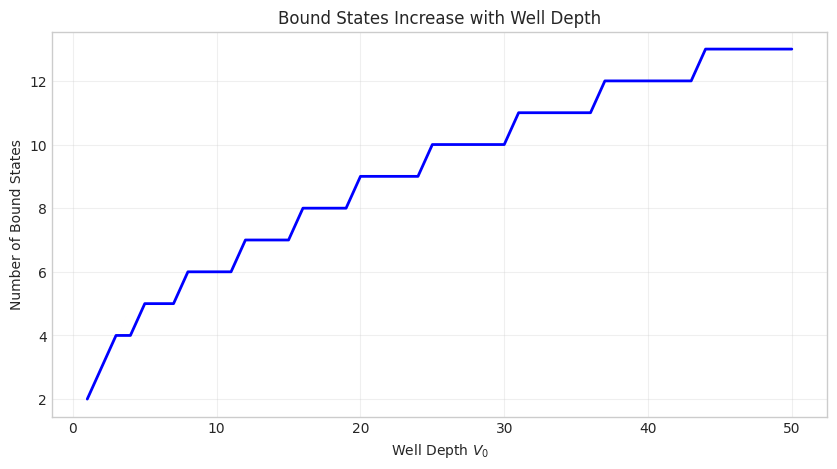

In [8]:
# ============================================================
# STUDY: How does V₀ affect number of bound states?
# ============================================================

V0_values = np.linspace(1, 50, 50)
n_bound_list = []

for V0_test in V0_values:
    V_test = finite_well_potential(x, V0_test, a)
    energies_test, _ = solve_schrodinger(T, V_test, n_states=30)
    n_bound_test = np.sum(energies_test < 0)
    n_bound_list.append(n_bound_test)

# Plot
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(V0_values, n_bound_list, 'b-', linewidth=2)
ax.set_xlabel(r'Well Depth $V_0$')
ax.set_ylabel('Number of Bound States')
ax.set_title('Bound States Increase with Well Depth')
ax.grid(True, alpha=0.3)
plt.savefig('bound_states_vs_depth.png', dpi=150)
plt.show()

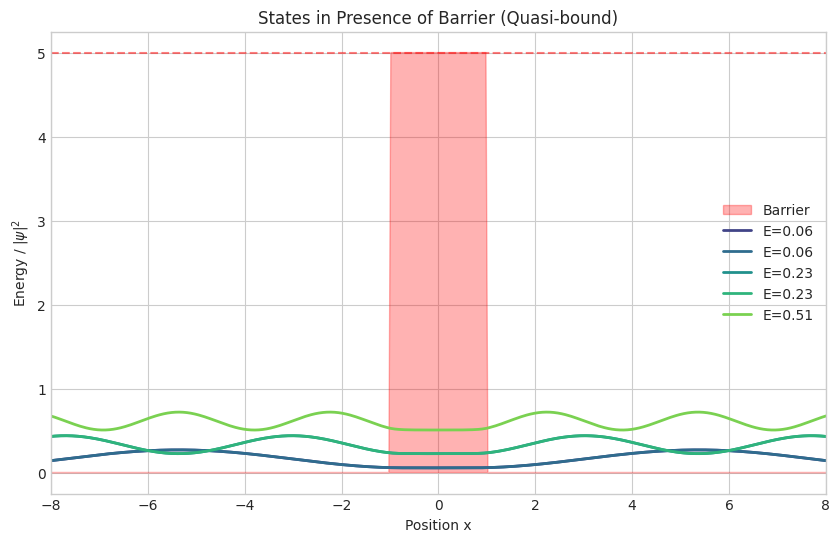

In [11]:
# ============================================================
# EXTENSION: Barrier potential (tunneling precursor)
# ============================================================

V0_barrier = 5.0
a_barrier = 1.0

V_barrier = barrier_potential(x, V0_barrier, a_barrier)
barrier_energies, barrier_psi = solve_schrodinger(T, V_barrier, n_states=10)

# Normalize
for i in range(10):
    norm = np.sqrt(np.trapezoid(barrier_psi[:, i]**2, x))
    barrier_psi[:, i] /= norm

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.fill_between(x, V_barrier, alpha=0.3, color='red', label='Barrier')
ax.axhline(V0_barrier, color='red', linestyle='--', alpha=0.5)

colors = plt.cm.viridis(np.linspace(0.2, 0.8, 5))
for n in range(5):
    E_n = barrier_energies[n]
    ax.plot(x, E_n + 2 * np.abs(barrier_psi[:, n])**2, 
            color=colors[n], linewidth=2, label=f'E={E_n:.2f}')

ax.set_xlabel('Position x')
ax.set_ylabel(r'Energy / $|\psi|^2$')
ax.set_title('States in Presence of Barrier (Quasi-bound)')
ax.set_xlim(-8, 8)
ax.legend()
plt.savefig('barrier_states.png', dpi=150)
plt.show()

## Key Insights

1. **Finite bound states**: Unlike infinite well, finite well has limited number of bound states
2. **Tunneling**: Wavefunctions extend into classically forbidden regions
3. **Decay length**: Deeper bound states have faster exponential decay
4. **Well depth**: More bound states appear as $V_0$ increases